<a href="https://colab.research.google.com/github/shinome551/MachineLearningSeminar/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインポート

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision.transforms as T
from torchvision.datasets import MNIST
device = torch.device('cuda:0')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,4.5
sns.set()

# データセットの用意

In [ ]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(0.5, 0.5)
])
trainset = MNIST(root='./data', train=True, download=True, transform=transform)
testset = MNIST(root='./data', train=False, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# データローダーの設定

In [ ]:
batchsize = 128
trainloader = DataLoader(trainset, batch_size=batchsize, shuffle=True,
                         pin_memory=True, num_workers=2, drop_last=True)
testloader = DataLoader(testset, batch_size=batchsize, shuffle=False,
                         pin_memory=True, num_workers=2)

# モデルの設定

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
)
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

# 最適化アルゴリズムの設定

In [ ]:
lr = 0.001
optimizer = Adam(model.parameters(), lr=lr)

# 学習を行う関数の定義

In [ ]:
def train(model, optimizer, trainloader, device):
    model.train()
    trainloss = 0
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        trainloss += loss.item()

    trainloss = trainloss / len(trainloader)
    return trainloss

# 検証を行う関数の定義

In [ ]:
def test(model, testloader, device):
    model.eval()
    correct = 0
    with torch.no_grad():
        for (inputs, labels) in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            pred = torch.argmax(outputs, 1)
            correct += (pred == labels).sum().item()
    acc = 100 * correct / len(testloader.dataset)
    return acc

# 学習と検証のループ

In [ ]:
num_epoch = 50
start = time.time()
trainloss_list = []
accuracy_list = []
for epoch in range(num_epoch):
    trainloss = train(model, optimizer, trainloader, device)
    accuracy = test(model, testloader, device)
    print(f"epoch:{epoch+1}, trainloss:{trainloss:.3f}, accuracy:{accuracy:.1f}%")
    trainloss_list.append(trainloss)
    accuracy_list.append(accuracy)

time_per_epochs = (time.time() - start) / num_epoch
print(f"time per epochs:{time_per_epochs:.3f}s, top acc:{max(accuracy_list):.1f}%")

epoch:1, trainloss:0.396, accuracy:93.0%
epoch:2, trainloss:0.197, accuracy:95.5%
epoch:3, trainloss:0.137, accuracy:96.4%
epoch:4, trainloss:0.106, accuracy:96.8%
epoch:5, trainloss:0.088, accuracy:97.1%
epoch:6, trainloss:0.076, accuracy:97.0%
epoch:7, trainloss:0.065, accuracy:97.3%
epoch:8, trainloss:0.055, accuracy:97.2%
epoch:9, trainloss:0.053, accuracy:97.6%
epoch:10, trainloss:0.046, accuracy:97.5%
epoch:11, trainloss:0.042, accuracy:97.7%
epoch:12, trainloss:0.039, accuracy:97.8%
epoch:13, trainloss:0.034, accuracy:97.7%
epoch:14, trainloss:0.034, accuracy:97.7%
epoch:15, trainloss:0.029, accuracy:97.3%
epoch:16, trainloss:0.026, accuracy:97.3%
epoch:17, trainloss:0.024, accuracy:97.2%
epoch:18, trainloss:0.022, accuracy:97.5%
epoch:19, trainloss:0.023, accuracy:97.8%
epoch:20, trainloss:0.020, accuracy:97.7%
epoch:21, trainloss:0.019, accuracy:97.8%
epoch:22, trainloss:0.016, accuracy:97.8%
epoch:23, trainloss:0.016, accuracy:97.5%
epoch:24, trainloss:0.017, accuracy:97.4%
e

# 学習結果

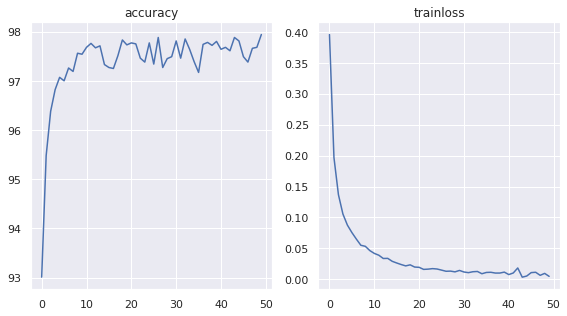

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].plot(accuracy_list)
ax[1].plot(trainloss_list)
ax[0].set_title("accuracy")
ax[1].set_title("trainloss")
fig.tight_layout()
plt.show()